# Examen Parcial ESMA4016: Data Mining y Machine Learning

The purpose of this notebook is to fulfill the requirements of the Machine Learning class exam at the University of Puerto Rico at Mayaguez. The exam consists of three questions:

<ul><li>I. Bank Marketing Dataset</li>
    <li>II. Flight delays Dataset</li>
    <li>III. Naive Bayes</li></ul>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Examen-Parcial-ESMA4016:-Data-Mining-y-Machine-Learning" data-toc-modified-id="Examen-Parcial-ESMA4016:-Data-Mining-y-Machine-Learning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Examen Parcial ESMA4016: Data Mining y Machine Learning</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Imports</a></span></li></ul></li></ul></li><li><span><a href="#Bank-Marketing-Dataset" data-toc-modified-id="Bank-Marketing-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Bank Marketing Dataset</a></span><ul class="toc-item"><li><span><a href="#Explotatory-Data-Analysis" data-toc-modified-id="Explotatory-Data-Analysis-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Explotatory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#PCA" data-toc-modified-id="PCA-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>PCA</a></span></li></ul></li><li><span><a href="#Comparación-sin/con-PCA" data-toc-modified-id="Comparación-sin/con-PCA-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Comparación sin/con PCA</a></span><ul class="toc-item"><li><span><a href="#ReliefF" data-toc-modified-id="ReliefF-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>ReliefF</a></span></li><li><span><a href="#Comparación-con-PCA-y-ReliefF" data-toc-modified-id="Comparación-con-PCA-y-ReliefF-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Comparación con PCA y ReliefF</a></span></li></ul></li></ul></li><li><span><a href="#Flight-Delay-Dataset" data-toc-modified-id="Flight-Delay-Dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Flight Delay Dataset</a></span><ul class="toc-item"><li><span><a href="#Modeling" data-toc-modified-id="Modeling-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Gradient-Boosting" data-toc-modified-id="Gradient-Boosting-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Gradient Boosting</a></span></li><li><span><a href="#XGBoosting" data-toc-modified-id="XGBoosting-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>XGBoosting</a></span></li><li><span><a href="#Registro" data-toc-modified-id="Registro-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Registro</a></span></li><li><span><a href="#Particiones" data-toc-modified-id="Particiones-3.1.5"><span class="toc-item-num">3.1.5&nbsp;&nbsp;</span>Particiones</a></span></li></ul></li></ul></li><li><span><a href="#Conclusions-and-Next-Steps" data-toc-modified-id="Conclusions-and-Next-Steps-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusions and Next Steps</a></span></li></ul></div>

### Imports
Import libraries and write settings here.

In [149]:

import pandas as pd  # Data Manipulation
import numpy as np  # Linear Algebra 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import numpy as np
import scipy.spatial.distance
from sklearn.metrics.pairwise  import pairwise_distances
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from mpl_toolkits.mplot3d import Axes3D

from skrebate import ReliefF
# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30
# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython import get_ipython
ipython = get_ipython()
# autoreload extension

if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload
%autoreload 2
# Visualizations
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.style as style 
from pandas.plotting import scatter_matrix 

style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')



# Bank Marketing Dataset


## Explotatory Data Analysis 

In [9]:
data = pd.read_csv("bank.csv", delimiter=";")

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [10]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [11]:
LB = LabelEncoder()


data_copy = data.copy()



attributes = ["education", "job", "marital", "default", "contact", "month", "poutcome", "housing", "loan", "y"]

for attribute in attributes:
    data_copy[attribute] = LB.fit_transform(data_copy[attribute].values)

data_copy.drop('duration', inplace=True, axis=1)
data_copy.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,1,-1,0,3,0


In [12]:
corr_matrix = data_copy.corr()

corr_matrix["y"].sort_values(ascending=False)

y            1.000000
previous     0.116714
pdays        0.104087
age          0.045092
education    0.042987
job          0.027401
balance      0.017905
marital      0.015042
default      0.001303
day         -0.011244
month       -0.040933
campaign    -0.061147
loan        -0.070517
poutcome    -0.082632
housing     -0.104683
contact     -0.133595
Name: y, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FAF2A721D0>,
      dtype=object)

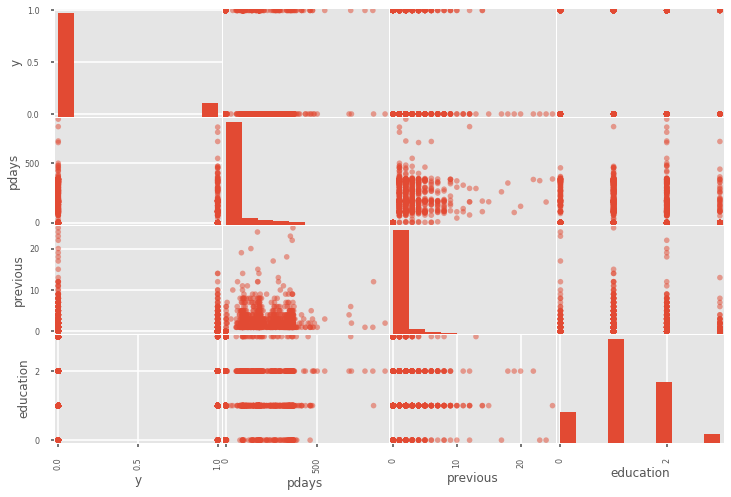

In [13]:
attributes = ["y", "pdays", "previous", "education"]

scatter_matrix(data_copy[attributes], figsize=(12,8))

In [15]:
y = data_copy["y"]
data_copy.drop('y', inplace=True, axis=1)

### Logistic Regression

In [18]:
X_train, X_test, y_train, y_test = train_test_split(data_copy,
                                                   y,
                                                   test_size=.3,
                                                   shuffle=True,
                                                   random_state=3)

logit_model = LogisticRegression(solver="liblinear")
logit_model.fit(X_train, y_train)

scores = cross_val_score(logit_model, X_test, y_test, cv=10)

print("Precision: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std()))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Precision: 0.882 (+/- 0.007)


In [51]:
decision_tree = DecisionTreeClassifier(random_state=3)
decision_tree.fit(X_train, y_train)

scores = cross_val_score(decision_tree, X_test, y_test, cv=10)

print("Precision: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std()))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=3, splitter='best')

Precision: 0.824 (+/- 0.008)


### PCA

In [60]:
pca=PCA(n_components=3)
principalComponents = pca.fit_transform(data_copy)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(principalComponents,
                                                   y,
                                                   test_size=.3,
                                                   shuffle=True,
                                                   random_state=3)

logit_model = LogisticRegression(solver="liblinear")
logit_model.fit(X_train, y_train)

scores = cross_val_score(logit_model, X_test, y_test, cv=10)

print("Precision: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std()))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Precision: 0.882 (+/- 0.001)


In [62]:
decision_tree = DecisionTreeClassifier(random_state=3)
decision_tree.fit(X_train, y_train)

scores = cross_val_score(decision_tree, X_test, y_test, cv=10)

print("Precision: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std()))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=3, splitter='best')

Precision: 0.814 (+/- 0.007)


## Comparación sin/con PCA

La clasificación logística y del árbol de decisión tiene una mejor precisión en Regresión Logística sin y con Análisis de Componentes Principales. La diferencia entre la precisión de la regresión logística es el cambio en la desviación. 

### ReliefF

In [20]:
fs = ReliefF(n_neighbors=3)
X = data_copy.astype(float)
y = y.astype(float)
fs.fit(X.values, y.values)
for feature_name, feature_score in zip(X.columns,fs.feature_importances_):
    print (feature_name, feature_score)

ReliefF(discrete_threshold=10, n_features_to_select=10, n_jobs=1, n_neighbors=3,
        verbose=False)

age 0.0725861014611551
job 0.028580429376713623
marital 0.11022635110226106
education 0.08803362088033478
default 0.004202610042026103
balance 0.02414538221699778
housing 0.06606208066062066
loan 0.047703310477033176
contact 0.08250387082503764
day 0.05745287424119492
month 0.02942497302152288
campaign 0.016518529552940423
pdays 0.020732504175214952
previous 0.01380520533805203
poutcome 0.040625230406252356


In [21]:
X.drop(["default", "balance", "loan", "month", "campaign", "pdays", "previous", "poutcome"], inplace=True, axis=1)

In [22]:
X.head()

,age,job,marital,education,housing,contact,day
0,30.0,10.0,1.0,0.0,0.0,0.0,19.0
1,33.0,7.0,1.0,1.0,1.0,0.0,11.0
2,35.0,4.0,2.0,2.0,1.0,0.0,16.0
3,30.0,4.0,1.0,2.0,1.0,2.0,3.0
4,59.0,1.0,1.0,1.0,1.0,2.0,5.0


In [23]:
pca=PCA(n_components=3)
principalComponents = pca.fit_transform(X)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(principalComponents,
                                                   y,
                                                   test_size=.3,
                                                   shuffle=True,
                                                   random_state=3)

logit_model = LogisticRegression(solver="liblinear")
logit_model.fit(X_train, y_train)

scores = cross_val_score(logit_model, X_test, y_test, cv=10)

print("Precision: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std()))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Precision: 0.885 (+/- 0.003)


In [27]:
decision_tree = DecisionTreeClassifier(random_state=3)
decision_tree.fit(X_train, y_train)

scores = cross_val_score(decision_tree, X_test, y_test, cv=10)

print("Precision: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std()))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=3, splitter='best')

Precision: 0.813 (+/- 0.028)


### Comparación con PCA y ReliefF

La regresión logística, una vez aplicada RelieF, aumenta levemente su desempeño en la precisión. El árbol de decisión disminuye. 

# Flight Delay Dataset

In [2]:
data = pd.read_csv("2004.csv")

data.tail()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
7129265,2004,12,16,4,1645.0,1639,1715.0,1716,DL,1138,N995DL,90.0,97,73.0,-1.0,6.0,ATL,MSY,425,4,13,0,NaN,0,0,0,0,0,0
7129266,2004,12,16,4,726.0,720,1238.0,1239,DL,1139,N916DE,192.0,199,171.0,-1.0,6.0,TUS,ATL,1541,10,11,0,NaN,0,0,0,0,0,0
7129267,2004,12,16,4,1336.0,1330,1507.0,1504,DL,1139,N916DE,91.0,94,76.0,3.0,6.0,ATL,DCA,547,5,10,0,NaN,0,0,0,0,0,0
7129268,2004,12,16,4,538.0,540,720.0,723,DL,1140,N990DL,102.0,103,83.0,-3.0,-2.0,PBI,ATL,545,7,12,0,NaN,0,0,0,0,0,0
7129269,2004,12,16,4,811.0,813,955.0,1008,DL,1140,N990DL,104.0,115,85.0,-13.0,-2.0,ATL,DTW,594,7,12,0,NaN,0,0,0,0,0,0


In [3]:
data.drop("CancellationCode", axis=1, inplace=True)

In [24]:
is_SJU =  data['Origin'] == 'SJU'

data_SJU = data[is_SJU]

data_SJU.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
10049,2004,1,7,3,1106.0,1040,1431.0,1402,UA,735,N404UA,325.0,322,294.0,29.0,26.0,SJU,ORD,2072,5,26,0,0,26,0,3,0,0
10050,2004,1,8,4,1043.0,1040,1420.0,1402,UA,735,N401UA,337.0,322,302.0,18.0,3.0,SJU,ORD,2072,10,25,0,0,0,0,18,0,0
10051,2004,1,9,5,1031.0,1040,1344.0,1402,UA,735,N412UA,313.0,322,288.0,-18.0,-9.0,SJU,ORD,2072,9,16,0,0,0,0,0,0,0
10052,2004,1,10,6,1043.0,1040,1359.0,1402,UA,735,N404UA,316.0,322,278.0,-3.0,3.0,SJU,ORD,2072,23,15,0,0,0,0,0,0,0
10053,2004,1,11,7,1041.0,1040,1415.0,1400,UA,735,N580UA,334.0,320,305.0,15.0,1.0,SJU,ORD,2072,11,18,0,0,0,0,15,0,0


In [77]:
data_copy = data_SJU.copy()
LB = LabelEncoder()

attributes = ["UniqueCarrier", "Origin", "Dest"]

for attribute in attributes:
    data_copy[attribute] = LB.fit_transform(data_copy[attribute].values)

In [78]:
data_copy.drop("TailNum", inplace=True, axis=1)
data_copy.isna().sum()

Year                   0
Month                  0
DayofMonth             0
DayOfWeek              0
DepTime              330
CRSDepTime             0
ArrTime              385
CRSArrTime             0
UniqueCarrier          0
FlightNum              0
ActualElapsedTime    385
CRSElapsedTime         0
AirTime              385
ArrDelay             385
DepDelay             330
Origin                 0
Dest                   0
Distance               0
TaxiIn                 0
TaxiOut                0
Cancelled              0
Diverted               0
CarrierDelay           0
WeatherDelay           0
NASDelay               0
SecurityDelay          0
LateAircraftDelay      0
dtype: int64

In [79]:
imputer = KNNImputer(n_neighbors = 3, weights="distance")
data_copy1 = imputer.fit_transform(data_copy)
data_copy = pd.DataFrame(data=data_copy1, index=data_copy.index, columns=data_copy.columns)


In [53]:
data_copy.isna().sum()
data_copy.head()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
10049,2004.0,1.0,7.0,3.0,1106.0,1040.0,1431.0,1402.0,6.0,735.0,325.0,322.0,294.0,29.0,26.0,0.0,20.0,2072.0,5.0,26.0,0.0,0.0,26.0,0.0,3.0,0.0,0.0
10050,2004.0,1.0,8.0,4.0,1043.0,1040.0,1420.0,1402.0,6.0,735.0,337.0,322.0,302.0,18.0,3.0,0.0,20.0,2072.0,10.0,25.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0
10051,2004.0,1.0,9.0,5.0,1031.0,1040.0,1344.0,1402.0,6.0,735.0,313.0,322.0,288.0,-18.0,-9.0,0.0,20.0,2072.0,9.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10052,2004.0,1.0,10.0,6.0,1043.0,1040.0,1359.0,1402.0,6.0,735.0,316.0,322.0,278.0,-3.0,3.0,0.0,20.0,2072.0,23.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10053,2004.0,1.0,11.0,7.0,1041.0,1040.0,1415.0,1400.0,6.0,735.0,334.0,320.0,305.0,15.0,1.0,0.0,20.0,2072.0,11.0,18.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0


In [80]:
data_copy1 = data_copy.copy()
data_copy1['DepDelay'].where(data_copy1['DepDelay'] <= 0.0, 1, inplace=True)
data_copy1['DepDelay'].where(data_copy1['DepDelay'] >= 0.0, 0, inplace=True)

data_copy1.tail()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
7128243,2004.0,12.0,16.0,4.0,1335.0,1340.0,1652.0,1645.0,3.0,178.0,257.0,245.0,234.0,7.0,0.0,0.0,0.0,1547.0,8.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7128297,2004.0,12.0,16.0,4.0,832.0,832.0,1130.0,1133.0,3.0,242.0,238.0,241.0,214.0,-3.0,0.0,0.0,0.0,1547.0,6.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7128378,2004.0,12.0,16.0,4.0,1247.0,1230.0,1543.0,1526.0,3.0,333.0,236.0,236.0,208.0,17.0,1.0,0.0,12.0,1597.0,10.0,18.0,0.0,0.0,1.0,0.0,0.0,0.0,16.0
7128481,2004.0,12.0,16.0,4.0,755.0,800.0,1108.0,1056.0,3.0,431.0,253.0,236.0,222.0,12.0,0.0,0.0,12.0,1597.0,10.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7129101,2004.0,12.0,16.0,4.0,1733.0,1735.0,2043.0,2040.0,3.0,998.0,250.0,245.0,225.0,3.0,0.0,0.0,0.0,1547.0,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
corr_matrix= data_copy1.corr()

corr_matrix["DepDelay"].sort_values(ascending=False)

DepDelay             1.000000
ArrDelay             0.413943
LateAircraftDelay    0.292387
CarrierDelay         0.223096
DepTime              0.140227
NASDelay             0.129139
CRSDepTime           0.094706
UniqueCarrier        0.064274
WeatherDelay         0.053330
TaxiOut              0.043284
SecurityDelay        0.042613
ArrTime              0.041659
CRSArrTime           0.025428
DayOfWeek            0.023851
TaxiIn               0.017990
CRSElapsedTime       0.007782
Diverted             0.007610
Distance             0.004276
ActualElapsedTime   -0.000642
Month               -0.001625
Cancelled           -0.003406
DayofMonth          -0.005506
AirTime             -0.009117
Dest                -0.011084
FlightNum           -0.031274
Year                      NaN
Origin                    NaN
Name: DepDelay, dtype: float64

In [81]:
data_copy1.drop(["Year", "AirTime", "DayofMonth", "Month", "Diverted", "ActualElapsedTime", "Distance", "Diverted", "CRSElapsedTime"], inplace=True, axis=1)

In [82]:
data_copy1.head()

,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,TaxiIn,TaxiOut,Cancelled,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
10049,3.0,1106.0,1040.0,1431.0,1402.0,6.0,735.0,29.0,1.0,0.0,20.0,5.0,26.0,0.0,26.0,0.0,3.0,0.0,0.0
10050,4.0,1043.0,1040.0,1420.0,1402.0,6.0,735.0,18.0,1.0,0.0,20.0,10.0,25.0,0.0,0.0,0.0,18.0,0.0,0.0
10051,5.0,1031.0,1040.0,1344.0,1402.0,6.0,735.0,-18.0,0.0,0.0,20.0,9.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0
10052,6.0,1043.0,1040.0,1359.0,1402.0,6.0,735.0,-3.0,1.0,0.0,20.0,23.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0
10053,7.0,1041.0,1040.0,1415.0,1400.0,6.0,735.0,15.0,1.0,0.0,20.0,11.0,18.0,0.0,0.0,0.0,15.0,0.0,0.0


## Modeling 

### Random Forest

In [83]:
X_train, X_test, y_train, y_test = train_test_split(data_copy1.drop("DepDelay", axis=1), 
                                                    data_copy1["DepDelay"],
                                                    test_size = .3,
                                                    shuffle=True,
                                                    random_state = 3)


rf_model = RandomForestClassifier(max_depth=2, random_state=0)

rf_model.fit(X_train, y_train)

scores = cross_val_score(rf_model, X_test, y_test, cv=10)

print("Precision: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std()))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Precision: 0.842 (+/- 0.008)


### Gradient Boosting 

In [87]:
gboost_model = GradientBoostingClassifier(n_estimators= 1000, 
                                          max_leaf_nodes=4, 
                                          max_depth=None, 
                                          random_state=2,
                                          min_samples_split=5)

gboost_model.fit(X_train, y_train)

scores = cross_val_score(gboost_model, X_test, y_test, cv=10)

print("Precision: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std()))

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=None,
                           max_features=None, max_leaf_nodes=4,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=2, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Precision: 0.917 (+/- 0.007)


### XGBoosting 

In [91]:
model = xgb.XGBClassifier(n_estimators= 1000, 
                          max_leaf_nodes=4, 
                          max_depth=None, 
                          random_state=2,
                          min_samples_split=5)

model.fit(X_train, y_train)

scores = cross_val_score(model, X_test, y_test, cv=10)

print("Precision: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std()))

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              max_leaf_nodes=4, min_child_weight=1, min_samples_split=5,
              missing=nan, monotone_constraints=None, n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, objective='binary:logistic',
              random_state=2, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method=None, validate_parameters=False,
              verbosity=None)

Precision: 0.949 (+/- 0.007)


### Registro

In [106]:
data = pd.read_csv("naive.csv")

data.head()

,Att1,Att2,Att3,Clase
0,T,T,1.0,1
1,T,T,6.0,1
2,T,F,5.0,0
3,F,F,4.0,1
4,F,T,7.0,0


In [107]:
codes = {"Att1": {"F": 0, "T": 1}, "Att2": {"F": 0, "T": 1}}

data.replace(codes,inplace=True)
data.head()

,Att1,Att2,Att3,Clase
0,1,1,1.0,1
1,1,1,6.0,1
2,1,0,5.0,0
3,0,0,4.0,1
4,0,1,7.0,0


In [153]:
clf = BernoulliNB()
X = data.drop("Clase", axis=1)
y = data["Clase"]
clf.fit(X, y)
pred = np.asarray([1, 1, 2.5])
pred = pred.reshape(1, -1)

clf.predict(pred)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

array([1], dtype=int64)

In [133]:
# calculate the entropy for a dataset
from math import log2
# proportion of examples in each class
class0 = 5/10
class1 = 5/10
# calculate entropy
# calculate the entropy for the split in the dataset
def entropy(class0, class1):
	return -(class0 * log2(class0) + class1 * log2(class1))

In [134]:
s_entropy = entropy(class0, class1)
print('Dataset Entropy: %.3f bits' % s_entropy)

Dataset Entropy: 1.000 bits


In [137]:
# split 1 (split via value1)
s1_class0 = 6 / 10
s1_class1 = 4 / 10
# calculate the entropy of the first group
s1_entropy = entropy(s1_class0, s1_class1)
print('Group1 Entropy: %.3f bits' % s1_entropy)

Group1 Entropy: 0.971 bits


In [138]:
# split 2  (split via value2)
s2_class0 = 5 / 10
s2_class1 = 5 / 10
# calculate the entropy of the second group
s2_entropy = entropy(s2_class0, s2_class1)
print('Group2 Entropy: %.3f bits' % s2_entropy)

Group2 Entropy: 1.000 bits


In [141]:
# calculate the information gain
gain = s_entropy - (10/20 * s1_entropy + 10/20 * s2_entropy)
print('Information Gain: %.3f bits' % gain)

Information Gain: 0.015 bits


### Particiones 

Mejor partición por Ganancia de Información: Att2
Mejor partición por Índice de Gini: Att1

Mejor partición por partes:
1: Att1
2: Att2

In [155]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [157]:
y = np.asarray([1,1,2.5])
y = y.reshape(1, -1)
model.predict(y)

array([0], dtype=int64)